# DiGraph Overview

https://networkx.org/documentation/stable/reference/algorithms/bipartite.html?highlight=bipartite#module-networkx.algorithms.bipartite

In [42]:
import networkx as nx
import psycopg2
import pandas as pd 
import sqlalchemy as salc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import json
#from networkx.algorithms import bipartite
#from networkx.algorithms import digraph
warnings.filterwarnings('ignore')



In [45]:
with open("config.json") as config_file:
    config = json.load(config_file)

database_connection_string = 'postgresql+psycopg2://{}:{}@{}:{}/{}'.format(config['user'], config['password'], config['host'], config['port'], config['database'])

dbschema='augur_data'
engine = salc.create_engine(
    database_connection_string,
    connect_args={'options': '-csearch_path={}'.format(dbschema)})

In [48]:
DG = nx.DiGraph()

In [49]:
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

DG.out_degree(1, weight='weight')

0.5

In [50]:
list(DG.successors(1))



[2]

In [51]:
list(DG.neighbors(1))

[2]

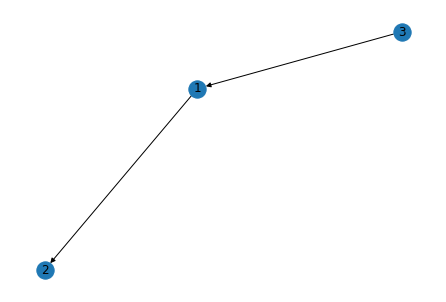

In [52]:
nx.draw(DG, with_labels=True)

# Getting Actual Augur Network Data

In [136]:
contrib_net = pd.DataFrame()

net_query = salc.sql.text(f"""
            SELECT 
                a.cntrb_id,
                a.repo_id,
                b.repo_name,
                b.repo_git,
                a.login, 
                MAX ( RANK ) AS weight 
            FROM
                explorer_contributor_actions a,
                repo b 
            WHERE
                a.repo_id = b.repo_id --and a.repo_id = 1
            GROUP BY
                a.cntrb_id,
                a.repo_id,
                b.repo_name,
                b.repo_git,
                a."login"
            ORDER BY
                repo_id;  

                """)

network = pd.read_sql(net_query, con=engine)

display(network)

network.dtypes

,cntrb_id,repo_id,repo_name,repo_git,login,weight
0,25537,1,rails,https://github.com/rails/rails.git,jcoyne,49
1,25566,1,rails,https://github.com/rails/rails.git,jeremyf,8
2,25577,1,rails,https://github.com/rails/rails.git,cbeer,1
3,25635,1,rails,https://github.com/rails/rails.git,twalpole,10
4,25952,1,rails,https://github.com/rails/rails.git,nicolasfranck,1
...,...,...,...,...,...,...
22322,25640,26093,xslt,https://github.com/ropensci/xslt,cboettig,1
22323,25678,26093,xslt,https://github.com/ropensci/xslt,jimhester,3
22324,25717,26093,xslt,https://github.com/ropensci/xslt,zkamvar,1
22325,42393,26093,xslt,https://github.com/ropensci/xslt,oggioniale,1


cntrb_id      int64
repo_id       int64
repo_name    object
repo_git     object
login        object
weight        int64
dtype: object

In [137]:
augDG = nx.DiGraph()

In [138]:
noderepo = network['repo_git']
nodecontrb = network['cntrb_id']#.unique()
weight = network['weight']


In [139]:
weighted_edges = (network['cntrb_id'], network['repo_git'], network['weight'])

In [140]:
networker = pd.DataFrame(weighted_edges)
networker = networker.transpose()

In [141]:
print(networker)

      cntrb_id                            repo_git weight
0        25537  https://github.com/rails/rails.git     49
1        25566  https://github.com/rails/rails.git      8
2        25577  https://github.com/rails/rails.git      1
3        25635  https://github.com/rails/rails.git     10
4        25952  https://github.com/rails/rails.git      1
...        ...                                 ...    ...
22322    25640    https://github.com/ropensci/xslt      1
22323    25678    https://github.com/ropensci/xslt      3
22324    25717    https://github.com/ropensci/xslt      1
22325    42393    https://github.com/ropensci/xslt      1
22326    51433    https://github.com/ropensci/xslt      1

[22327 rows x 3 columns]


In [180]:
grapher=nx.from_pandas_edgelist(networker, 'cntrb_id', 'repo_git',edge_attr='weight', create_using=nx.DiGraph)

In [181]:
print(grapher)

DiGraph with 17248 nodes and 22321 edges


In [182]:
sizer=nx.DiGraph.size(grapher)

In [183]:
print(sizer)

22321


In [184]:
repos=networker['repo_git'].unique()

In [185]:
grapher.size()

22321

In [186]:
grapher.degree

DiDegreeView({25537: 25, 'https://github.com/rails/rails.git': 4960, 25566: 24, 25577: 25, 25635: 2, 25952: 6, 25975: 1, 25977: 1, 25980: 1, 25983: 1, 25986: 1, 25991: 1, 25992: 1, 25993: 1, 25994: 1, 25997: 1, 26010: 1, 26011: 1, 26014: 1, 26016: 1, 26017: 1, 26019: 1, 26020: 1, 26021: 1, 26024: 1, 26025: 1, 26027: 1, 26028: 1, 26031: 1, 26033: 1, 26035: 1, 26036: 1, 26037: 1, 26041: 1, 26042: 1, 26046: 1, 26047: 1, 26048: 1, 26049: 1, 26051: 1, 26052: 1, 26053: 1, 26057: 1, 26060: 1, 26062: 1, 26063: 1, 26065: 1, 26068: 1, 26072: 1, 26073: 1, 26074: 1, 26080: 1, 26083: 1, 26085: 1, 26094: 1, 26095: 1, 26097: 1, 26098: 1, 26100: 1, 26103: 1, 26105: 1, 26108: 1, 26109: 1, 26110: 1, 26111: 1, 26113: 1, 26114: 1, 26117: 2, 26123: 1, 26125: 1, 26126: 1, 26129: 1, 26130: 1, 26131: 1, 26133: 1, 26136: 1, 26138: 1, 26139: 1, 26140: 1, 26141: 1, 26142: 1, 26144: 1, 26147: 1, 26149: 1, 26151: 1, 26155: 1, 26156: 1, 26157: 1, 26159: 1, 26160: 1, 26161: 1, 26162: 1, 26163: 1, 26168: 3, 26169: 1,

In [187]:
grapher.in_degree

InDegreeView({25537: 0, 'https://github.com/rails/rails.git': 4960, 25566: 0, 25577: 0, 25635: 0, 25952: 0, 25975: 0, 25977: 0, 25980: 0, 25983: 0, 25986: 0, 25991: 0, 25992: 0, 25993: 0, 25994: 0, 25997: 0, 26010: 0, 26011: 0, 26014: 0, 26016: 0, 26017: 0, 26019: 0, 26020: 0, 26021: 0, 26024: 0, 26025: 0, 26027: 0, 26028: 0, 26031: 0, 26033: 0, 26035: 0, 26036: 0, 26037: 0, 26041: 0, 26042: 0, 26046: 0, 26047: 0, 26048: 0, 26049: 0, 26051: 0, 26052: 0, 26053: 0, 26057: 0, 26060: 0, 26062: 0, 26063: 0, 26065: 0, 26068: 0, 26072: 0, 26073: 0, 26074: 0, 26080: 0, 26083: 0, 26085: 0, 26094: 0, 26095: 0, 26097: 0, 26098: 0, 26100: 0, 26103: 0, 26105: 0, 26108: 0, 26109: 0, 26110: 0, 26111: 0, 26113: 0, 26114: 0, 26117: 0, 26123: 0, 26125: 0, 26126: 0, 26129: 0, 26130: 0, 26131: 0, 26133: 0, 26136: 0, 26138: 0, 26139: 0, 26140: 0, 26141: 0, 26142: 0, 26144: 0, 26147: 0, 26149: 0, 26151: 0, 26155: 0, 26156: 0, 26157: 0, 26159: 0, 26160: 0, 26161: 0, 26162: 0, 26163: 0, 26168: 0, 26169: 0, 26

In [188]:
grapher.out_degree

OutDegreeView({25537: 25, 'https://github.com/rails/rails.git': 0, 25566: 24, 25577: 25, 25635: 2, 25952: 6, 25975: 1, 25977: 1, 25980: 1, 25983: 1, 25986: 1, 25991: 1, 25992: 1, 25993: 1, 25994: 1, 25997: 1, 26010: 1, 26011: 1, 26014: 1, 26016: 1, 26017: 1, 26019: 1, 26020: 1, 26021: 1, 26024: 1, 26025: 1, 26027: 1, 26028: 1, 26031: 1, 26033: 1, 26035: 1, 26036: 1, 26037: 1, 26041: 1, 26042: 1, 26046: 1, 26047: 1, 26048: 1, 26049: 1, 26051: 1, 26052: 1, 26053: 1, 26057: 1, 26060: 1, 26062: 1, 26063: 1, 26065: 1, 26068: 1, 26072: 1, 26073: 1, 26074: 1, 26080: 1, 26083: 1, 26085: 1, 26094: 1, 26095: 1, 26097: 1, 26098: 1, 26100: 1, 26103: 1, 26105: 1, 26108: 1, 26109: 1, 26110: 1, 26111: 1, 26113: 1, 26114: 1, 26117: 2, 26123: 1, 26125: 1, 26126: 1, 26129: 1, 26130: 1, 26131: 1, 26133: 1, 26136: 1, 26138: 1, 26139: 1, 26140: 1, 26141: 1, 26142: 1, 26144: 1, 26147: 1, 26149: 1, 26151: 1, 26155: 1, 26156: 1, 26157: 1, 26159: 1, 26160: 1, 26161: 1, 26162: 1, 26163: 1, 26168: 3, 26169: 1, 2

In [189]:
nx.degree_centrality(grapher)

{25537: 0.0014495274540499796,
 'https://github.com/rails/rails.git': 0.287586246883516,
 25566: 0.0013915463558879806,
 25577: 0.0014495274540499796,
 25635: 0.00011596219632399837,
 25952: 0.00034788658897199514,
 25975: 5.7981098161999185e-05,
 25977: 5.7981098161999185e-05,
 25980: 5.7981098161999185e-05,
 25983: 5.7981098161999185e-05,
 25986: 5.7981098161999185e-05,
 25991: 5.7981098161999185e-05,
 25992: 5.7981098161999185e-05,
 25993: 5.7981098161999185e-05,
 25994: 5.7981098161999185e-05,
 25997: 5.7981098161999185e-05,
 26010: 5.7981098161999185e-05,
 26011: 5.7981098161999185e-05,
 26014: 5.7981098161999185e-05,
 26016: 5.7981098161999185e-05,
 26017: 5.7981098161999185e-05,
 26019: 5.7981098161999185e-05,
 26020: 5.7981098161999185e-05,
 26021: 5.7981098161999185e-05,
 26024: 5.7981098161999185e-05,
 26025: 5.7981098161999185e-05,
 26027: 5.7981098161999185e-05,
 26028: 5.7981098161999185e-05,
 26031: 5.7981098161999185e-05,
 26033: 5.7981098161999185e-05,
 26035: 5.7981098

In [190]:
centrality_scores = nx.katz_centrality(grapher)

In [191]:
nx.betweenness_centrality(grapher)

{25537: 0.0,
 'https://github.com/rails/rails.git': 0.0,
 25566: 0.0,
 25577: 0.0,
 25635: 0.0,
 25952: 0.0,
 25975: 0.0,
 25977: 0.0,
 25980: 0.0,
 25983: 0.0,
 25986: 0.0,
 25991: 0.0,
 25992: 0.0,
 25993: 0.0,
 25994: 0.0,
 25997: 0.0,
 26010: 0.0,
 26011: 0.0,
 26014: 0.0,
 26016: 0.0,
 26017: 0.0,
 26019: 0.0,
 26020: 0.0,
 26021: 0.0,
 26024: 0.0,
 26025: 0.0,
 26027: 0.0,
 26028: 0.0,
 26031: 0.0,
 26033: 0.0,
 26035: 0.0,
 26036: 0.0,
 26037: 0.0,
 26041: 0.0,
 26042: 0.0,
 26046: 0.0,
 26047: 0.0,
 26048: 0.0,
 26049: 0.0,
 26051: 0.0,
 26052: 0.0,
 26053: 0.0,
 26057: 0.0,
 26060: 0.0,
 26062: 0.0,
 26063: 0.0,
 26065: 0.0,
 26068: 0.0,
 26072: 0.0,
 26073: 0.0,
 26074: 0.0,
 26080: 0.0,
 26083: 0.0,
 26085: 0.0,
 26094: 0.0,
 26095: 0.0,
 26097: 0.0,
 26098: 0.0,
 26100: 0.0,
 26103: 0.0,
 26105: 0.0,
 26108: 0.0,
 26109: 0.0,
 26110: 0.0,
 26111: 0.0,
 26113: 0.0,
 26114: 0.0,
 26117: 0.0,
 26123: 0.0,
 26125: 0.0,
 26126: 0.0,
 26129: 0.0,
 26130: 0.0,
 26131: 0.0,
 26133:

In [163]:
for n in len(repos):
    nx.Digraph.subgraph(grapher)

TypeError: 'int' object is not iterable

In [157]:
print(repos)

['https://github.com/rails/rails.git'
 'https://github.com/senaite/senaite.core.git'
 'https://github.com/senaite/senaite.health.git'
 'https://github.com/senaite/senaite.lims.git'
 'https://github.com/senaite/senaite.com.git'
 'https://github.com/senaite/senaite.github.io.git'
 'https://github.com/senaite/senaite.api.git'
 'https://github.com/senaite/senaite.jsonapi.git'
 'https://github.com/senaite/senaite.sync.git'
 'https://github.com/senaite/senaite.exporter.git'
 'https://github.com/senaite/senaite.impress.git'
 'https://github.com/senaite/senaite.core.supermodel.git'
 'https://github.com/senaite/senaite.databox.git'
 'https://github.com/senaite/senaite.reflex.git'
 'https://github.com/senaite/senaite.storage.git'
 'https://github.com/senaite/senaite.core.listing.git'
 'https://github.com/senaite/senaite.instruments.git'
 'https://github.com/senaite/senaite.docker.git'
 'https://github.com/mollyproject/mollyproject.git'
 'https://github.com/mollyproject/django-compress.git'
 'htt

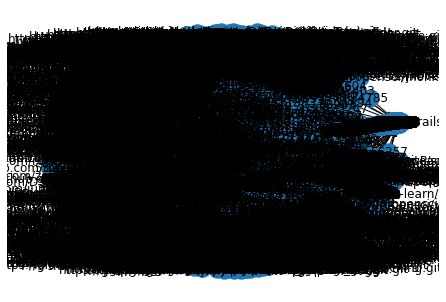

In [144]:
nx.draw(grapher, with_labels=True)

In [154]:
nx.closeness_centrality(grapher)

{25537: 0.2754646788215767,
 'https://github.com/rails/rails.git': 0.32619549716164586,
 25566: 0.27646749804537946,
 25577: 0.2889216597982822,
 25635: 0.2677467517184668,
 25952: 0.2636988335226801,
 25975: 0.24581928213487766,
 25977: 0.24581928213487766,
 25980: 0.24581928213487766,
 25983: 0.24581928213487766,
 25986: 0.24581928213487766,
 25991: 0.24581928213487766,
 25992: 0.24581928213487766,
 25993: 0.24581928213487766,
 25994: 0.24581928213487766,
 25997: 0.24581928213487766,
 26010: 0.24581928213487766,
 26011: 0.24581928213487766,
 26014: 0.24581928213487766,
 26016: 0.24581928213487766,
 26017: 0.24581928213487766,
 26019: 0.24581928213487766,
 26020: 0.24581928213487766,
 26021: 0.24581928213487766,
 26024: 0.24581928213487766,
 26025: 0.24581928213487766,
 26027: 0.24581928213487766,
 26028: 0.24581928213487766,
 26031: 0.24581928213487766,
 26033: 0.24581928213487766,
 26035: 0.24581928213487766,
 26036: 0.24581928213487766,
 26037: 0.24581928213487766,
 26041: 0.245819